<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
                


Exception: 
This task is not complete. 
Replace this line with your code for the task.

In [4]:
df = pd.read_csv(r'C:\Users\lesle\Desktop\lambda\Unit 4 Sprint 1\DS-Unit-4-Sprint-1-NLP\module2-vector-representations\data\job_listings.csv')

In [5]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [8]:
len(df)

426

In [68]:
from bs4 import BeautifulSoup

description_clean = []

for x in range(0,426):
    soup = BeautifulSoup(df['description'][x])
    description_clean.append(soup.get_text())
    


In [73]:

for x in range(0,426):
    description_clean[x] = description_clean[x].replace("\\n", " ")
    description_clean[x] = description_clean[x].replace('b"', "")
    

In [90]:
cleaned = pd.DataFrame(description_clean, columns=['Text'])

In [91]:
cleaned['Text']

0      Job Requirements: Conceptual understanding in ...
1      b'Job Description  As a Data Scientist 1, you ...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
                             ...                        
421    About Us: Want to be part of a fantastic and f...
422    b'InternshipAt Uber, we ignite opportunity by ...
423    b'$200,000 - $350,000 a yearA million people a...
424    SENIOR DATA SCIENTIST JOB DESCRIPTION  ABOUT U...
425    b'Cerner Intelligence is a new, innovative org...
Name: Text, Length: 426, dtype: object

In [75]:
description_clean[5]

"b'Create various Business Intelligence Analytical reports, visualization and dashboards with BI tools like Tableau, Power BI or similar; Utilize experience in scientific data, logic programming and calculated columns, and decision making; Develop and maintain dashboards for KPIs, purchase trends with time series and customer flows with Tableau and Teradata; Develop recommendation models utilizing machine learning and predictive analysis with supervised and unsupervised algorithms like random forest, support vector machine and k-means clustering; Utilize experience with SQL with strong concepts of database, data warehouse and metadata; Work closely with frontend web developer and UX designer on improving online shopping experience and deploying business strategies like promotion or similar; Analyze customer behaviors and purchase trends to create customized recommended items; Conduct and apply A/B test to monitor and test new or modified features for online shopping experiences across 

In [55]:
# description_clean[0] = description_clean[0].split('b"', 1)
# description_clean[0][0] = description_clean[0].split('\\n', 1)

AttributeError: 'list' object has no attribute 'split'

In [69]:
# for x in range(0,1):
#     description_clean[0].split("\\n", 1)
#     for x in range(1,50):
#         description_clean[0][x].split("\\n", x)
    

In [ ]:
# for x in range(0,50):
#     description_clean[x].split("\\n", 1)
#     description_clean[x] + description_clean[x+1]
    

In [57]:

# description_clean[0] = description_clean[0].split('\\n', 1)

In [76]:
description_clean[0]

'Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"'

In [26]:
description_clean = description_clean.strip("\n", " ")

AttributeError: 'DataFrame' object has no attribute 'strip'

In [25]:
description_clean

,0
0,"b""Job Requirements:\nConceptual understanding ..."
1,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,b'As a Data Scientist you will be working on c...
3,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'Location: USA \xe2\x80\x93 multiple location...
...,...
421,"b""About Us:\nWant to be part of a fantastic an..."
422,"b'InternshipAt Uber, we ignite opportunity by ..."
423,"b'$200,000 - $350,000 a yearA million people a..."
424,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB..."


## 2) Use Spacy to tokenize the listings 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [92]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [93]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(cleaned['Text'], batch_size=1000):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [94]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"[job, requirements:, conceptual, understanding..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"[b'job, description, , data, scientist, 1,, h..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,"[b'as, data, scientist, working, consulting, b..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"[b'$4,969, $6,756, monthcontractunder, general..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,"[b'location:, usa, \xe2\x80\x93, multiple, loc..."


'requirements:'

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
#for row in dataframe
# text = text.split("\n")




# create the transformer
vect = CountVectorizer()



vect.fit(cleaned['Text'])
dtm = vect.transform(cleaned['Text'])
    
    
# # build vocab
# vect.fit(df['tokens'][x])



# # transform text
# dtm = vect.transform(df['tokens'][x])

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!


In [119]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


AttributeError: 'list' object has no attribute 'todense'

## 4) Visualize the most common word counts

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [124]:
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [120]:
import counter()

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')


In [125]:
wc = count(df['tokens'])

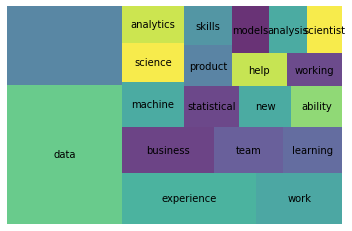

In [126]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off') 
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."


In [127]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=2,
                        max_features=8000,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(cleaned['Text']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,,1,2,25,3,4,5,6,\xc2\xbb,...,you\xe2\x80\x99re,you\xe2\x80\x99re data,you\xe2\x80\x99re look,you\xe2\x80\x99ve,young,yrs,zf,zf\xe2\x80\x99s,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.072655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.032256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.064522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [129]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [139]:
job = ["""Experienced with python SQL pandas random forests, KNN, and a total badass
"""]



new = tfidf.transform(job)

In [140]:
nn.kneighbors(new.todense())

(array([[1.29898264, 1.33370294, 1.3427148 , 1.3472694 , 1.3486751 ]]),
 array([[  0, 366, 345,  79, 327]], dtype=int64))

In [137]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.28721388, 1.30368237, 1.30457525, 1.3119219 ]]),
 array([[  0, 115, 276, 338, 274]], dtype=int64))

In [133]:
cleaned['Text'][0]

'Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"'

In [142]:
cleaned['Text'][274]

"b'General Description: Assist researchers and software developers on projects bridging the gap between research and analytics by providing data-driven solutions across several policy areas. Work with research and analytics staff in development of streamlined protocols through gathering requirements. Assist team with schema, business rules and configuration testing processes. Support development efforts with standardized protocols to manipulate information captured in a fixed format to usable data, using non-traditional data sources like scraping data from social media, mining data from natural language texts, as well as vectorizing images to create analytical dataset to inform policy decisions. Assist development teams drafting and compiling requirements for complex statistical models, machine learning algorithms and deep learning networks. Assist Data Scientists in developing data products that contain dynamic data visualizations to present findings, data explorers that allow users t

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 